- Numerical solution of differential equation: Boundary Value Problems

In [1]:
import math
import numpy as np
import matplotlib.pyplot as pl

## Task 1: Direct method
![](2022-11-04-21-07-56.png)

In [2]:
def myfunc(x):
    return (2*x,2,math.cos(3*x))

def MyGauss(A,b):
    n = len(b)
    for i in range(0,n-1):
        for j in range(i+1,n):
            p = A[j,i] / A[i,i]
            for k in range(i,n):
                A[j,k] = A[j,k] - p * A[i,k]
                
            b[j] = b[j] - p * b[i]
    
    x = np.zeros(n)
    
    for i in range(n-1,-1,-1):
        x[i] = b[i] / A[i,i]
        
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]
            
    return x

In [3]:
def myodebc(a,b,ya,yb,N):
    
    # generate xgrid
    x = np.linspace(a,b,N+1)
    h = (b-a)/N
    
    #generate matrix to fill
    matrice = np.zeros((N+1,N+1))
    matrice[0][0] = 1
    matrice[N][N] = 1
    
    # generate list of constants
    alist = np.zeros((N+1,1))
    blist = np.zeros((N+1,1))
    clist = np.zeros((N+1,1))
    
    # generate right hand side
    plist = np.zeros((N+1,1))
    plist[0] = ya
    plist[N] = yb
    
    for i in range (1,N):
        #get the values for the x functions
        f,g,p = myfunc(x[i])
        plist[i] = [p]
        
        #get values for the constants
        alist[i] = [1/(h**2) - f/2/h]
        blist[i] = [g-2/(h**2)]
        clist[i] = [1/(h**2) + f/2/h]
    
    for i in range(1,N):
        #add constants to matrix
        matrice[i][i-1] = alist[i]
        matrice[i][i]   = blist[i]
        matrice[i][i+1] = clist[i]
        
    #pass on to Gauss Solver
    
    result = MyGauss(matrice,plist)
#     print(x)
#     print(result)
    # print(matrice)
    return(result,x)
    

#     print(x)
#     print("A")
#     print(alist)
#     print("B")
#     print(blist)
#     print("C")
#     print(clist)
#     print("P")
#     print(plist)
        
    
    

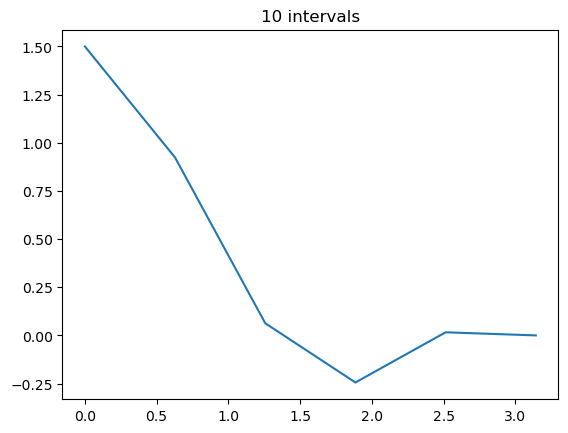

Text(0.5, 1.0, '100 intervals')

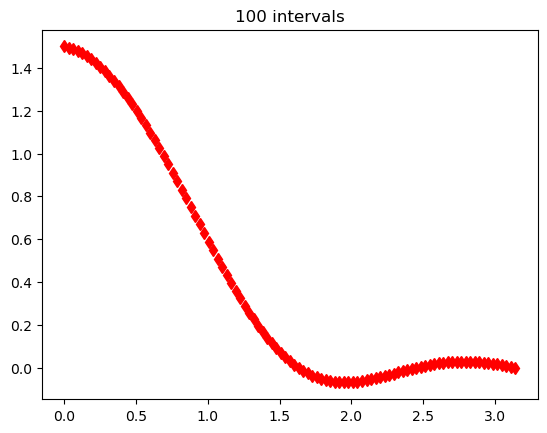

In [4]:
a = 0
b = math.pi
ya = 1.5
yb = 0
N = 5

y, x = myodebc(a,b,ya,yb,N)

pl.plot(x,y)
pl.title("10 intervals")


N = 100
y, x = myodebc(a,b,ya,yb,N)

pl.show()
pl.plot(x,y,"rd")
pl.title("100 intervals")


## Task 2: Iterative methods
- ![](2022-11-04-21-08-37.png)

In [5]:
## Replicate Task 1 but solve with the jacobi

## nOT COMPLETED YET


def MyJacobi(a,b,ya,yb,N,e): 
    # generate xgrid
    x = np.linspace(a,b,N+1)
    h = (b-a)/N
    
    #generate matrix to fill
    matrice = np.zeros((N+1,N+1))
    matrice[0][0] = 1
    matrice[N][N] = 1
    
    # generate list of constants
    alist = np.zeros((N+1,1))
    blist = np.zeros((N+1,1))
    clist = np.zeros((N+1,1))
    
    # generate right hand side
    plist = np.zeros((N+1,1))
    plist[0] = ya
    plist[N] = yb
    
    for i in range (1,N):
        #get the values for the x functions
        f,g,p = myfunc(x[i])
        plist[i] = [p]
        
        #get values for the constants
        alist[i] = [1/(h**2) - f/2/h]
        blist[i] = [g-2/(h**2)]
        clist[i] = [1/(h**2) + f/2/h]
    
    for i in range(1,N):
        #add constants to matrix
        matrice[i][i-1] = alist[i]
        matrice[i][i]   = blist[i]
        matrice[i][i+1] = clist[i]
        
    #Now the Jacobi Solver
    # we now have a matrice: (NxN) matrix and plist: (Nx1) matrix
    
    sol = np.ones(len(matrice))
    result = jacobiSolver(matrice,plist,sol,N)
    
    return(x, result)
    
    
    
    
#     # initialise solution list
#     solutions = np.ones((len(matrice),1))
    
#     # initiliase error(to be used later)
#     error = e
    
#     # initialise condition for stopping
#     condition = True
#     count = 0

#     for k in range(0,10):
#         count +=1
#         #print(count)
#         for i in range(0,len(matrice)):
#             temp = solutions[i][0]
#             #print(plist[i])
#             solutions[i][0] += (plist[i][0] / matrice[i][i])
#             for j in range(0,len(matrice)):
#                 if(i==j):
#                     count +=1
#                 else:
#                     solutions[i][0] -= (matrice[i][j] * solutions[j][0]) /matrice[i][i]
                
                
#             #print(temp-solutions[i])
#             condition = e < (temp - solutions[i])
                
                
#     #print(len(matrice))
#     return(x,solutions)
        
    

    

In [6]:
#Given Solution
def Jacobi(a,b,ya,yb,N,tol):
    # a,b are the starting and final points
    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]

    y = np.zeros(N+1)
    yk = np.zeros(N+1)
    
    c = 0
    err = 10.0 * tol
    while err > tol and c<100000:
        # enforce bc
        y[0] = ya
        y[N] = yb
        # evaluate internal points for next iteration
        for i in range(1,N):
            # solve for this x
            # evaluate the functions f, g and p at this x
            (f, g, p) = myfunc(x[i])
            y[i] = ( -(yk[i+1]+yk[i-1])/h**2 - f*(yk[i+1]-yk[i-1])/(2*h) + p ) / (g-2/h**2)

        err = np.max(np.abs(y - yk))
        yk = np.copy(y)


    return (x,y)



Jacobi visualiser
https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/d3fd06c8-d832-46a4-b187-546cb17a8065/465c4d5d-4cb8-4ce3-a959-fc12475866b9/images/screenshot.jpg

Text(0.5, 1.0, '50 intervals')

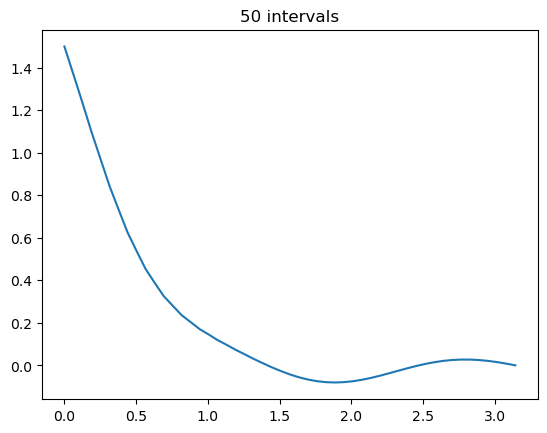

In [7]:
a = 0
b = math.pi
ya = 1.5
yb = 0
N = 50
e = 0.01

x,y = Jacobi(a,b,ya,yb,N,e)

pl.plot(x,y)
pl.title("{} intervals".format(N))

## Task 3: Types of boundary conditions
- ![](2022-11-04-21-10-16.png)

Text(0.5, 1.0, '50 intervals')

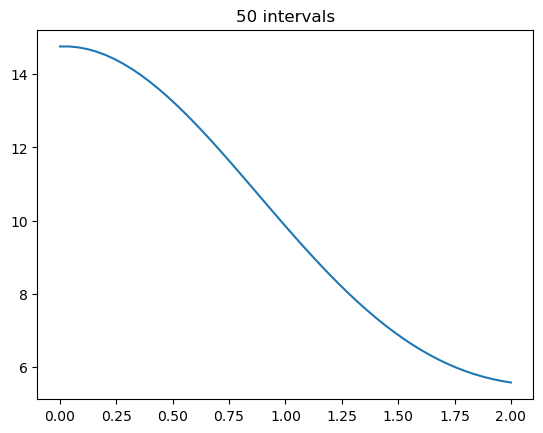

In [8]:
"""for boundary conditions with derivatives employ forward and backward scheme
at a and b respectively"""
## Modify myodebc to acommodate different boundary conditions


def myfunc(x):
    q = 5
    return (x,1,q*x)


def Modifiedmyodebc(a,b,ya,yb,N,c):
    
    
    # generate xgrid
    x = np.linspace(a,b,N+1)
    h = (b-a)/N
    
    #generate matrix to fill
    matrice = np.zeros((N+1,N+1))
    matrice[0][0] = 1
    matrice[N][N] = 1
    
    # generate list of constants
    alist = np.zeros((N+1,1))
    blist = np.zeros((N+1,1))
    clist = np.zeros((N+1,1))
    

    # generate right hand side
    plist = np.zeros((N+1,1)) # this hold all y values y0,y1,y2...yn
    
    #impose boundaries
    plist[0] = ya
    matrice[0][0] = c[1]- c[0]/h
    matrice[0][1] = c[0]/h
    
    plist[N] = yb
    matrice[N][N] = c[3] + c[2]/h
    matrice[N][N-1] = -c[2]/h
    
    for i in range (1,N):
        #get the values for the x functions
        f,g,p = myfunc(x[i])
        plist[i] = [p]
        
        #get values for the constants
        alist[i] = [1/(h**2) - f/2/h]
        blist[i] = [g-2/(h**2)]
        clist[i] = [1/(h**2) + f/2/h]
    
    for i in range(1,N):
        #add constants to matrix
        matrice[i][i-1] = alist[i]
        matrice[i][i]   = blist[i]
        matrice[i][i+1] = clist[i]
        
    #pass on to Gauss Solver
    
#     for row in matrice:
#         print(row)
    

    
    #result = MyGauss(matrice,plist)
    result = np.linalg.inv(matrice).dot(plist)
    return(result,x)
    
    
####    
a = 0
b = 2
ya = 0
yb = -1
N = 50
# c0 = c2 = 0 : dirichlet ----- c1 = c3= 0: neumeann
c = [1,0,1,0]

y,x = Modifiedmyodebc(a,b,ya,yb,N,c)

pl.plot(x,y)
pl.title("{} intervals".format(N))

0.015 0.018 -37731.34328358209 1694328.3582089553 50 [1, 0, 1, 3582.089552238806]


Text(0.5, 1.0, '50 intervals')

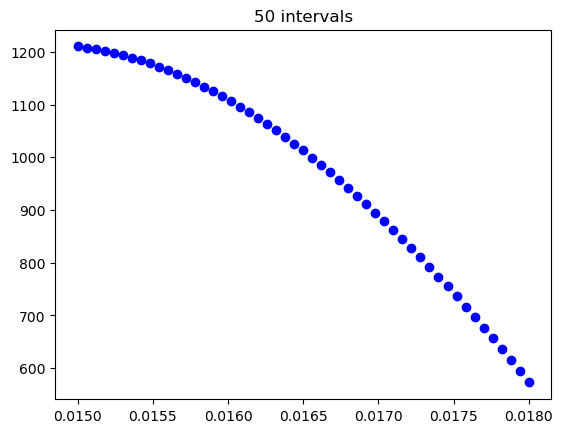

In [9]:
k = 16.75
h = 6*(10**4)
R = 0.015
w = 0.003
Tw = 473

def myfunc(x):
    k = 16.75
    R = 0.015
    p = (-10**8)/(x*k)*math.exp(-x/R)
    return (1/x,0,p)

a = R
b = R + w
ya = -6.32*10**5/k
yb = h/k*(473)
N = 50
# c0 = c2 = 0 : dirichlet ----- c1 = c3= 0: neumeann
c = [1,0,1,h/k]


y,x = Modifiedmyodebc(a,b,ya,yb,N,c)


print(a,b,ya,yb,N,c)

pl.plot(x,y,"bo")
pl.title("{} intervals".format(N))

# Task 4: Nuclear Fuel Road Heat Transfer
![](2022-11-04-21-11-04.png)
